# Data Science Case Study

# Load the Data from movie_metadata.csv to a dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Modify to the directory where the csv file is available
os.chdir('C:/Users/Tulasi/Desktop/Python/Data Science Case Study')

In [3]:
pwd

'C:\\Users\\Tulasi\\Desktop\\Python\\Data Science Case Study'

In [4]:
#Load the data to be processed
data = pd.read_csv("movie_metadata.csv",encoding= "ISO-8859-1")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_movie_link             5043 non-

In [6]:
#Remove the repeated rows of data
data.drop_duplicates(keep=False, inplace=True)

In [7]:
#Information:The data has 4953 rows x 28 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 5042
Data columns (total 28 columns):
color                        4934 non-null object
director_name                4851 non-null object
num_critic_for_reviews       4905 non-null float64
duration                     4938 non-null float64
director_facebook_likes      4851 non-null float64
actor_3_facebook_likes       4930 non-null float64
actor_2_name                 4940 non-null object
actor_1_facebook_likes       4946 non-null float64
gross                        4089 non-null float64
genres                       4953 non-null object
actor_1_name                 4946 non-null object
movie_title                  4953 non-null object
num_voted_users              4953 non-null int64
cast_total_facebook_likes    4953 non-null int64
actor_3_name                 4930 non-null object
facenumber_in_poster         4940 non-null float64
plot_keywords                4802 non-null object
movie_movie_link             4953 non-

In [8]:
#Removal of unused columns for this analysis
data=data.drop(columns=['movie_movie_link'])

# Handling Missing Values

In [9]:
data.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        48
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        864
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                151
num_user_for_reviews          21
language                      12
country                        5
content_rating               299
budget                       482
title_year                   106
actor_2_facebook_likes        13
movie_score                    0
aspect_ratio                 325
movie_facebook_likes           0
dtype: int64

In [10]:
#Since the gross and budget give the response variable whichever approximation we do would affect our analysis
#so we choose to remove the rows 
data=data.dropna(subset=['gross','budget'])

#If we dont want to miss the data we can impute with mean or any other strategy
#data["gross"].fillna(data.groupby("movie_score")["gross"].transform("mean"), inplace=True)
#data["budget"].fillna(data.groupby("color")["budget"].transform("median"), inplace=True)

#Also any row that has more missing data than 4 shall be dropped
data.dropna(thresh=4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [11]:
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
movie_score                   0
aspect_ratio                 73
movie_facebook_likes          0
dtype: int64

In [12]:
# Imputing other missing values with most_occuring as obtained from the value_counts()
# or default value which would not affect the analysis
data['color'].fillna(value='Color', inplace=True)
data['director_name'].fillna(value='Other', inplace=True)
data['director_facebook_likes'].fillna(value=0, inplace=True)
data['actor_1_facebook_likes'].fillna(value=0, inplace=True)
data['actor_2_facebook_likes'].fillna(value=0, inplace=True)
data['actor_3_facebook_likes'].fillna(value=0, inplace=True)
data['num_critic_for_reviews'].fillna(value=0, inplace=True)
data['actor_2_name'].fillna(value='Unknown', inplace=True)
data['actor_1_name'].fillna(value='Unknown', inplace=True)
data['actor_3_name'].fillna(value='Unknown', inplace=True)
data['plot_keywords'].fillna(value='None', inplace=True)
data['content_rating'].fillna(value='R', inplace=True)
data['aspect_ratio'].fillna(value=2.35, inplace=True)
data['duration'].fillna(value=90, inplace=True)
data['facenumber_in_poster'].fillna(value=0, inplace=True)
data['num_user_for_reviews'].fillna(value=1, inplace=True)
data['title_year'].loc[data['color']!='Color'].fillna(value=2004, inplace=True)
data['title_year'].fillna(value=2009, inplace=True)
data['gross'].fillna(data.groupby("country")["gross"].transform("mean"), inplace=True)
data['language'].fillna(value='English', inplace=True)
data['country'].fillna(value='USA', inplace=True)
data['budget'].fillna(data.groupby("country")["budget"].transform("mean"), inplace=True)

In [13]:
data.isnull().sum().sum()

0

# Feature engineering:Defining new and meaningful variables from existing ones

In [14]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'movie_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [15]:
#Length of the movie title
data['movie_title_length']=data['movie_title'].str.len()
data['movie_title_length'] = np.where(data['movie_title_length']>10,1,0)

In [16]:
#Profit of the movie=Revenue-Expenses
data['profit']=data['gross']-data['budget']
data['profit_status']=np.where(data['profit']<0,'Loss','Gain')
data['profit_ratio']=data['profit']/data['budget']

In [17]:
# Response variable:To determine if a movie is a block buster we assume that 
# movie score is greater than 7.5 and there is a profit greater than 70%
data['movie_status']=np.where(((data['movie_score']>=7.5)&(data['profit_status']=='Gain')&(data['profit_ratio']>0.7)),'BlockBuster','Flop')
data['movie_status'].value_counts()

Flop           3488
BlockBuster     335
Name: movie_status, dtype: int64

In [18]:
# Grouping the actors into one column to reduce the feature size
data['actors']=data[['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()

In [19]:
# Formatting the genres data from a pattern like "data1|data2|data3" to [data1,data2,data3]
data['genres']=data['genres'].str.split("|")

In [20]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'movie_score',
       'aspect_ratio', 'movie_facebook_likes', 'movie_title_length', 'profit',
       'profit_status', 'profit_ratio', 'movie_status', 'actors'],
      dtype='object')

# Handling the categorical variables

In [21]:
color_mapping = {label:idx for idx,label in enumerate(np.unique(data['color']))}
data['color'] = data['color'].map(color_mapping)
data['color'].value_counts()
result_mapping = {label:idx for idx,label in enumerate(np.unique(data['movie_status']))}
data['movie_status'] = data['movie_status'].map(result_mapping)
data['movie_status'].value_counts()

1    3488
0     335
Name: movie_status, dtype: int64

In [22]:
result_mapping

{'BlockBuster': 0, 'Flop': 1}

In [23]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
#data['director_name']= class_le.fit_transform(data['director_name'].values)
#data['director_name'].value_counts()

In [24]:
data['actor_1_name']= class_le.fit_transform(data['actor_1_name'].values)
data['actor_1_name'].value_counts()
data['actor_2_name']= class_le.fit_transform(data['actor_2_name'].values)
data['actor_2_name'].value_counts()
data['actor_3_name']= class_le.fit_transform(data['actor_3_name'].values)
data['actor_3_name'].value_counts()
#data['country']= class_le.fit_transform(data['country'].values)
#data['country'].value_counts()
data['content_rating']= class_le.fit_transform(data['content_rating'].values)
data['content_rating'].value_counts()
#le = LabelEncoder()
#le.fit(data['language'])
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#data['language']= le.fit_transform(data['language'].values)
#data['language'].value_counts()

9     1760
7     1297
6      570
1       91
5       42
10      24
0       17
11      10
4        6
8        3
3        2
2        1
Name: content_rating, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 5042
Data columns (total 33 columns):
color                        3823 non-null int64
director_name                3823 non-null object
num_critic_for_reviews       3823 non-null float64
duration                     3823 non-null float64
director_facebook_likes      3823 non-null float64
actor_3_facebook_likes       3823 non-null float64
actor_2_name                 3823 non-null int64
actor_1_facebook_likes       3823 non-null float64
gross                        3823 non-null float64
genres                       3823 non-null object
actor_1_name                 3823 non-null int64
movie_title                  3823 non-null object
num_voted_users              3823 non-null int64
cast_total_facebook_likes    3823 non-null int64
actor_3_name                 3823 non-null int64
facenumber_in_poster         3823 non-null float64
plot_keywords                3823 non-null object
num_user_for_reviews         3823 non-null

    # Exploratory Data Analysis: Understanding and deriving hypothesis from data

In [26]:
# Exploring the data with respect to profit
data['profit'].describe()

count    3.823000e+03
mean     5.574395e+06
std      2.278938e+08
min     -1.221330e+10
25%     -1.015702e+07
50%      8.256380e+05
75%      2.440000e+07
max      5.235058e+08
Name: profit, dtype: float64

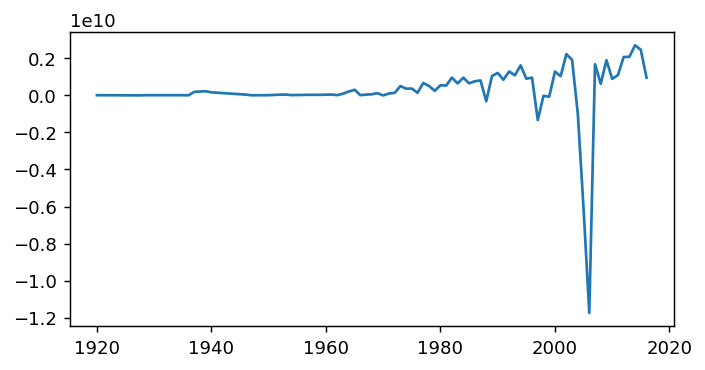

In [27]:
#Understanding the performance of the movies summarized per year
profits_year = data.groupby('title_year')['profit'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi = 130)

#on x-axis
plt.xlabel='Title Year of Movies'
#on y-axis
plt.ylabel='Profits earned by Movies'
#title of the line plot
plt.title='Representing Total Profits earned by all movies Vs Year'

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


In [28]:
#Getting the years having maximum profit and minimum profit as shown above
max_profit = data.groupby('title_year')['profit'].sum().max()
max_profit_year = profits_year.idxmax()
max_profit , max_profit_year

(2692068012.0, 2014.0)

In [29]:
min_profit = data.groupby('title_year')['profit'].sum().min()
min_profit_year = profits_year.idxmin()
min_profit , min_profit_year

(-11736472618.0, 2006.0)

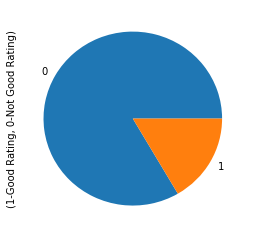

In [30]:
data['movie_score_status'] = np.where(data['movie_score'] >= 7.5, 1, 0)

data['movie_score_status'].value_counts(normalize=True).plot(kind='pie', figsize=(4,4), label=('1-Good Rating','0-Not Good Rating'))

In [31]:
#Exploring the most expensive movies data to see it is beneficial to create a block buster if you spend more or not
#We observe that although more budget is given they all had loss and even doesnt assure good movie rating 
expensive_movies_df = data.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_score,aspect_ratio,movie_facebook_likes,movie_title_length,profit,profit_status,profit_ratio,movie_status,actors,movie_score_status
2988,1,Joon-ho Bong,363.0,110.0,584.0,74.0,1145,629.0,2201412.0,"[Comedy, Drama, Horror, Sci-Fi]",...,7.0,1.85,7000,0,-1.221330e+10,Loss,-0.999820,1,"[Doona Bae, Kang-ho Song, Ah-sung Ko]",0
3859,1,Chan-wook Park,202.0,112.0,0.0,38.0,2259,717.0,211667.0,"[Crime, Drama]",...,7.7,2.35,4000,1,-4.199788e+09,Loss,-0.999950,1,"[Min-sik Choi, Yeong-ae Lee, Hye-jeong Kang]",1
3005,1,Lajos Koltai,73.0,134.0,45.0,0.0,1667,9.0,195888.0,"[Drama, Romance, War]",...,7.1,2.35,607,0,-2.499804e+09,Loss,-0.999922,1,"[Marcell Nagy, P?©ter Fancsikai, B?°lint P?©ntek]",0
2323,1,Hayao Miyazaki,174.0,134.0,6000.0,745.0,910,893.0,2298191.0,"[Adventure, Animation, Fantasy]",...,8.4,1.85,11000,1,-2.397702e+09,Loss,-0.999042,1,"[Minnie Driver, Jada Pinkett Smith, Billy Crudup]",1
2334,1,Katsuhiro ?îtomo,105.0,103.0,78.0,101.0,1848,488.0,410388.0,"[Action, Adventure, Animation, Family, Sci-Fi,...",...,6.9,1.85,973,0,-2.127110e+09,Loss,-0.999807,1,"[William Hootkins, Robin Atkin Downes, Rosalin...",0


In [32]:
#Let us explore more into profitable movies: Profitable movies are mostly resulting in good ratings too
profitable_movies_df = data.sort_values(by = 'profit', ascending=False).head()
profitable_movies_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_score,aspect_ratio,movie_facebook_likes,movie_title_length,profit,profit_status,profit_ratio,movie_status,actors,movie_score_status
0,1,James Cameron,723.0,178.0,0.0,855.0,1052,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,7.9,1.78,33000,0,523505847.0,Gain,2.208885,0,"[CCH Pounder, Joel David Moore, Wes Studi]",1
29,1,Colin Trevorrow,644.0,124.0,365.0,1000.0,1120,3000.0,652177271.0,"[Action, Adventure, Sci-Fi, Thriller]",...,7.0,2.00,150000,1,502177271.0,Gain,3.347848,1,"[Bryce Dallas Howard, Judy Greer, Omar Sy]",0
26,1,James Cameron,315.0,194.0,0.0,794.0,1157,29000.0,658672302.0,"[Drama, Romance]",...,7.7,2.35,26000,0,458672302.0,Gain,2.293362,0,"[Leonardo DiCaprio, Kate Winslet, Gloria Stuart]",1
3024,1,George Lucas,282.0,125.0,0.0,504.0,1721,11000.0,460935665.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,8.7,2.35,33000,1,449935665.0,Gain,40.903242,0,"[Harrison Ford, Peter Cushing, Kenny Baker]",1
3080,1,Steven Spielberg,215.0,120.0,14000.0,548.0,561,861.0,434949459.0,"[Family, Sci-Fi]",...,7.9,1.85,34000,1,424449459.0,Gain,40.423758,0,"[Henry Thomas, Dee Wallace, Peter Coyote]",1


In [33]:
#selecting the movies having profit of 70% or more and rating >=7.5
blockbuster_data = data[data['movie_status'] == 0]

#reindexing new data
blockbuster_data.index = range(len(blockbuster_data))

#we will start from 1 instead of 0
blockbuster_data.index = blockbuster_data.index + 1


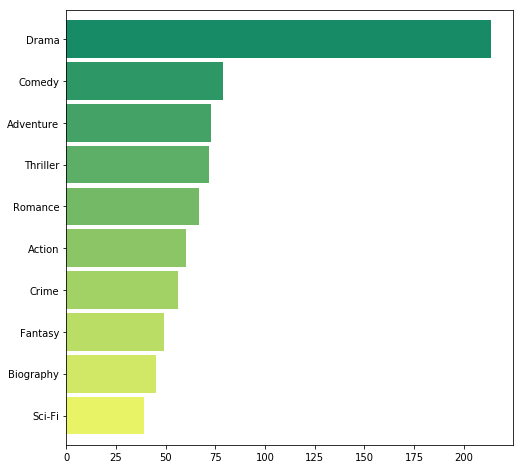

In [34]:
plt.subplots(figsize=(8,8))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in blockbuster_data['genres']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax

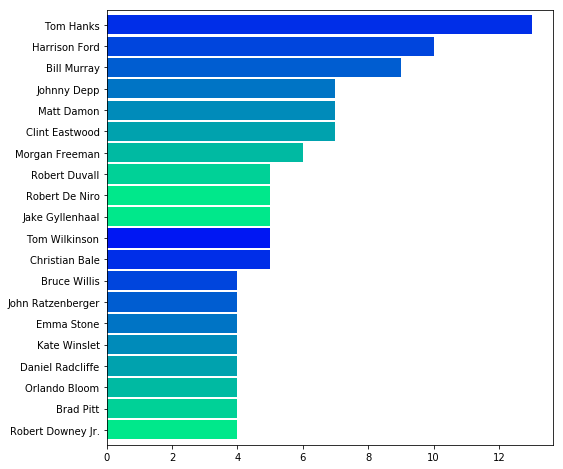

In [35]:
plt.subplots(figsize=(8,8))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in blockbuster_data['actors']:
    list1.extend(i)

    
actor_count_series = pd.Series(list1).value_counts()[:20].sort_values(ascending=True)

ax = actor_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('winter_r',10))

ax

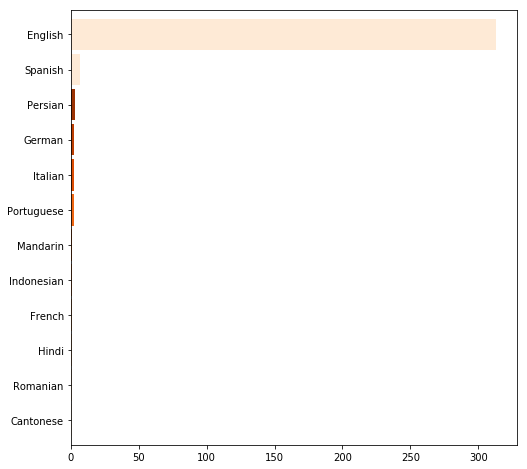

In [36]:
plt.subplots(figsize=(8,8))


language_count_series = blockbuster_data['language'].value_counts().sort_values(ascending=True)


ax = language_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('Oranges',10))

ax

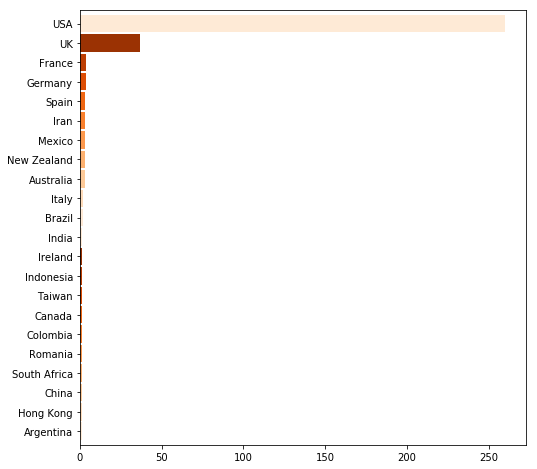

In [37]:
plt.subplots(figsize=(8,8))


country_count_series = blockbuster_data['country'].value_counts().sort_values(ascending=True)


ax = country_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('Oranges',10))

ax

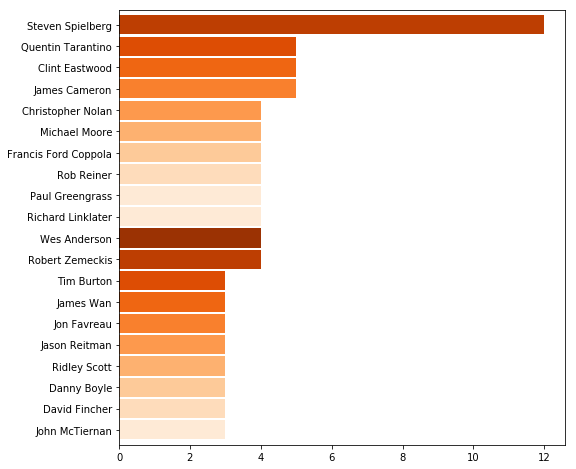

In [38]:
plt.subplots(figsize=(8,8))


director_count_series = blockbuster_data['director_name'].value_counts().sort_values(ascending=True).tail(20)


ax = director_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('Oranges',10))

ax

In [39]:
blockbuster_data['gross'].mean()

112048735.47462687

In [40]:
blockbuster_data['budget'].mean()

31708738.22089552

In [41]:
blockbuster_data['duration'].mean()

122.78507462686566

In [42]:
blockbuster_data['movie_title_length'].value_counts()

1    274
0     61
Name: movie_title_length, dtype: int64

# Summary

# For a Movie to be a blockbuster:
Average Budget must be around 32 millon dollar
Average duration of the movie must be 122 minutes
Any one of these should be cast:Tom Hanks, Harrison Ford, Bill Murray, Johny Depp, Matt Damon, Clint Eastwood, Morgan Freeman
Any one of these should be director: Steven Spielberg, Quentin Taratino, Clint Eastwood, James Cameron
Genre must be : Drama, Comedy, Adventure, Thriller, Romance.
By doing all this the movie might be one of the hits and hence can earn an average revenue of around 112 million dollar.